In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/My Drive/BT4222/Data_3 (TF-IDF + Most_Listings_Features + SVD).csv',index_col=0)

In [4]:
df.columns

Index(['reviewer_id', 'preference', 'listing_id', 'host_is_superhost',
       'latitude', 'longitude', 'price', 'number_of_reviews_ltm',
       'calculated_host_listings_count', 'nearby_sites_rating',
       ...
       'Air conditioning', 'Kitchen', 'Parking', 'Outdoor', 'Kids',
       'Pets allowed', 'Workspace', 'Gym', 'Breakfast',
       'availability_average'],
      dtype='object', length=185)

In [5]:
y = df.preference

In [6]:
X = df.drop(columns=["reviewer_id","listing_id","host_is_superhost"])

In [7]:
X.drop(columns=["preference"],inplace=True)

In [8]:
X.head()

,latitude,longitude,price,number_of_reviews_ltm,calculated_host_listings_count,nearby_sites_rating,nearest_station_dist,host_response_time_cross_rate,item_factor_0,user_factor_0,item_factor_1,user_factor_1,item_factor_2,user_factor_2,item_factor_3,user_factor_3,item_factor_4,user_factor_4,item_factor_5,user_factor_5,item_factor_6,user_factor_6,item_factor_7,user_factor_7,item_factor_8,user_factor_8,item_factor_9,user_factor_9,text_factor_0,text_factor_1,text_factor_2,text_factor_3,text_factor_4,text_factor_5,text_factor_6,text_factor_7,text_factor_8,text_factor_9,text_factor_10,text_factor_11,...,offline_government_id,selfie,government_id,identity_manual,work_email,manual_online,manual_offline,x0_Central Region,x0_East Region,x0_North Region,x0_North-East Region,x0_West Region,x0_apartment,x0_bed and breakfast,x0_boat,x0_boutique hotel,x0_bungalow,x0_condominium,x0_guest suite,x0_hostel,x0_hotel,x0_house,x0_loft,x0_other,x0_townhouse,x0_Entire home/apt,x0_Hotel room,x0_Private room,x0_Shared room,Wifi,Air conditioning,Kitchen,Parking,Outdoor,Kids,Pets allowed,Workspace,Gym,Breakfast,availability_average
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.44255,103.79580,79.0,0,2,0.995731,0.617762,2.0,-0.080090,-0.045423,-0.072907,0.119669,0.077274,0.045258,0.037663,0.085235,-0.038879,0.009194,0.038809,-0.038233,0.030629,-0.072737,0.032604,0.082893,0.287333,-0.098187,0.089866,0.021846,0.142089,0.000000,0.018916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,1,0,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,0,0,0,0,0,0,0,0,1.0
1,1.33235,103.78521,80.0,0,1,1.269606,0.399696,0.0,0.081554,-0.049855,-0.105953,0.044933,-0.116901,0.131527,-0.017028,0.111009,-0.086785,-0.002848,-0.020847,0.074678,-0.037473,-0.052219,-0.075626,-0.012367,0.034406,0.001945,0.085947,0.008726,0.000000,0.092355,0.046490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,0,1,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,1,0,0,0,0,0,1,0,1.0
2,1.33235,103.78521,80.0,0,1,1.269606,0.399696,0.0,0.081554,-0.045758,-0.105953,-0.057649,-0.116901,-0.014033,-0.017028,0.041884,-0.086785,0.181634,-0.020847,-0.046492,-0.037473,-0.133720,-0.075626,-0.118024,0.034406,0.067946,0.085947,-0.158080,0.000000,0.092355,0.046490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,0,1,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,1,0,0,0,0,0,1,0,1.0
3,1.33235,103.78521,80.0,0,1,1.269606,0.399696,0.0,0.081554,0.028973,-0.105953,0.145273,-0.116901,0.066612,-0.017028,-0.063751,-0.086785,0.176873,-0.020847,-0.142651,-0.037473,0.024285,-0.075626,0.007321,0.034406,0.025454,0.085947,0.055499,0.000000,0.092355,0.046490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,0,1,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,1,0,0,0,0,0,1,0,1.0
4,1.33235,103.78521,80.0,0,1,1.269606,0.399696,0.0,0.081554,-0.055366,-0.105953,-0.037461,-0.116901,0.030717,-0.017028,0.059124,-0.086785,0.139225,-0.020847,0.046353,-0.037473,-0.032285,-0.075626,-0.020036,0.034406,0.008693,0.085947,-0.050897,0.000000,0.092355,0.046490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,0,1,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,1,0,0,0,0,0,1,0,1.0


In [10]:
y = df.preference

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [14]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
def mse(y_predicted, y_true):
    return np.mean(np.square(y_predicted - y_true))
mse_training = mse(lr.predict(X_train), y_train)
mse_testing = mse(lr.predict(X_test), y_test)
print("training mse: {}, testing mse: {}".format(mse_training, mse_testing))
print("training rmse: {}, testing rmse: {}".format(np.sqrt(mse_training), np.sqrt(mse_testing)))

training mse: 0.022959891688684883, testing mse: 0.023022246662982797
training rmse: 0.15152521799583357, testing rmse: 0.1517308362297618


# Random Forest

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [18]:
forest = RandomForestRegressor(random_state = 1, n_estimators = 10, min_samples_split = 2)
params = {
            'max_depth': [5, 10],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 5]
        }

rf = GridSearchCV(forest, params, cv = 3, verbose = 1, n_jobs = -1)
rf.fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed: 12.0min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=None,
                                             oob_score=False, random_state=1,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-

In [19]:
print('best parameters: ', rf.best_params_)

best parameters:  {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}


In [20]:
y_train_pred = rf.predict(X_train)
y_pred = rf.predict(X_test)
mse_training = mse(rf.predict(X_train), y_train)
mse_testing = mse(rf.predict(X_test), y_test)
print("training mse: {}, testing mse: {}".format(mse_training, mse_testing))
print("training rmse: {}, testing rmse: {}".format(np.sqrt(mse_training), np.sqrt(mse_testing)))

training mse: 0.019275092825690388, testing mse: 0.021529345681312092
training rmse: 0.1388347680723038, testing rmse: 0.1467288168060797


In [21]:
rf.best_estimator_.feature_importances_

array([1.81498335e-02, 1.67352745e-02, 1.90383873e-02, 1.72664350e-03,
       6.37317278e-02, 7.49255364e-03, 5.49142228e-03, 3.20449222e-03,
       4.07260106e-03, 1.38903917e-02, 5.99567982e-03, 1.65497252e-02,
       4.90790561e-03, 1.65008365e-02, 3.97881741e-03, 1.76389815e-02,
       5.26764200e-03, 1.76877828e-02, 5.77045016e-03, 1.62427697e-02,
       5.15248033e-03, 1.56728743e-02, 6.50234152e-03, 2.00800111e-02,
       3.96449405e-03, 1.73802526e-02, 6.54388098e-03, 1.87418307e-02,
       2.45463102e-03, 3.93212856e-03, 7.12893015e-03, 2.63394994e-03,
       3.13610178e-03, 1.64073109e-03, 3.61680596e-03, 5.16407531e-03,
       1.59300626e-03, 3.42169111e-03, 4.30065181e-03, 9.43730845e-04,
       3.31601989e-03, 4.03410529e-03, 6.00830813e-05, 1.01002159e-02,
       3.60130588e-03, 7.27662663e-03, 8.76000084e-03, 3.12623453e-03,
       1.02928453e-02, 4.56578306e-03, 1.39551720e-03, 2.16972202e-03,
       1.33693422e-03, 2.45629694e-03, 7.95821596e-03, 1.69688892e-02,
      

In [22]:
X_train.columns

Index(['latitude', 'longitude', 'price', 'number_of_reviews_ltm',
       'calculated_host_listings_count', 'nearby_sites_rating',
       'nearest_station_dist', 'host_response_time_cross_rate',
       'item_factor_0', 'user_factor_0',
       ...
       'Air conditioning', 'Kitchen', 'Parking', 'Outdoor', 'Kids',
       'Pets allowed', 'Workspace', 'Gym', 'Breakfast',
       'availability_average'],
      dtype='object', length=181)

<BarContainer object of 181 artists>

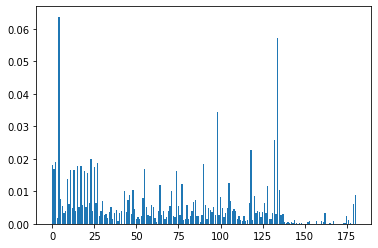

In [26]:
from matplotlib import pyplot
pyplot.bar(range(len(rf.best_estimator_.feature_importances_)), rf.best_estimator_.feature_importances_)

# XGBRegressor

In [27]:
from xgboost import XGBRegressor

In [28]:
import xgboost; print(xgboost.__version__)

0.90


In [29]:
xgb1 = XGBRegressor()
parameters = {
              'objective':['reg:linear','reg:squarederror'],
              'learning_rate': [.03, 0.05], #so called `eta` value
              'max_depth': [5, 6, 7],
              'n_estimators': [10,20]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train,y_train)


Fitting 2 folds for each of 24 candidates, totalling 48 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  48 out of  48 | elapsed:  6.3min finished


[14:47:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=2, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=5,
             param_grid={'learning_rate': [0.03, 0.05], 'max_depth': [5, 6, 7],
                         'n_estimators': [10, 20],
    

In [30]:
y_train_pred = xgb_grid.predict(X_train)
y_pred = xgb_grid.predict(X_test)
mse_training = mse(xgb_grid.predict(X_train), y_train)
mse_testing = mse(xgb_grid.predict(X_test), y_test)
print("training mse: {}, testing mse: {}".format(mse_training, mse_testing))
print("training rmse: {}, testing rmse: {}".format(np.sqrt(mse_training), np.sqrt(mse_testing)))

training mse: 0.03545869254938718, testing mse: 0.03620867840255548
training rmse: 0.18830478631566214, testing rmse: 0.19028578087328407


In [31]:
xgb_grid.best_estimator_.feature_importances_

array([0.00485735, 0.0042426 , 0.00599937, 0.00356299, 0.02018136,
       0.0035207 , 0.00255986, 0.00320381, 0.00210811, 0.00089567,
       0.00281211, 0.00113962, 0.00269124, 0.00144592, 0.00320307,
       0.00104874, 0.00229628, 0.00100953, 0.00316233, 0.00103801,
       0.00194786, 0.0009845 , 0.00219791, 0.00119935, 0.00264139,
       0.00136895, 0.00272322, 0.00158339, 0.00359706, 0.00345921,
       0.00588269, 0.00356229, 0.00296522, 0.00442379, 0.00324493,
       0.00661854, 0.00613787, 0.00557398, 0.00517619, 0.00299976,
       0.00253174, 0.00243973, 0.00383589, 0.00969658, 0.00502242,
       0.00413086, 0.00627625, 0.00500849, 0.01650698, 0.00620722,
       0.        , 0.00405925, 0.00258583, 0.0068118 , 0.01081651,
       0.01996408, 0.00805589, 0.00542253, 0.00667508, 0.00553731,
       0.00618388, 0.005972  , 0.00329627, 0.00417215, 0.0070438 ,
       0.00124148, 0.00428838, 0.0034595 , 0.00395255, 0.0035722 ,
       0.00642953, 0.0073935 , 0.00280495, 0.00603312, 0.03739

In [32]:
X_train.columns

Index(['latitude', 'longitude', 'price', 'number_of_reviews_ltm',
       'calculated_host_listings_count', 'nearby_sites_rating',
       'nearest_station_dist', 'host_response_time_cross_rate',
       'item_factor_0', 'user_factor_0',
       ...
       'Air conditioning', 'Kitchen', 'Parking', 'Outdoor', 'Kids',
       'Pets allowed', 'Workspace', 'Gym', 'Breakfast',
       'availability_average'],
      dtype='object', length=181)

<BarContainer object of 181 artists>

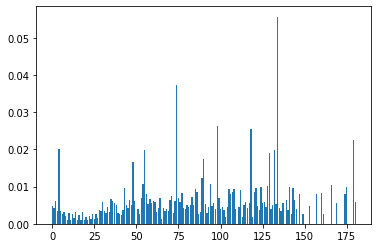

In [33]:
from matplotlib import pyplot
pyplot.bar(range(len(xgb_grid.best_estimator_.feature_importances_)), xgb_grid.best_estimator_.feature_importances_)